# What is mean by outliers?

An outlier is a data point that is noticeably different from the rest. They represent errors in measurement, bad data collection, or simply show variables not considered when collecting the data. Wikipedia defines it as 'an observation point that is distant from other observations.

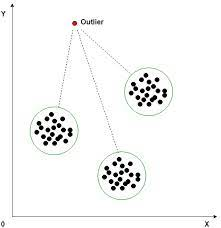

# Various ways of finding the outlier.
<b>1] Using scatter plots</b>

<b>2] Box plot</b>

<b>3] Using z score</b>

<b>4] Using the IQR interquantile range</b>

# Standard Deviation Method
If we know that the distribution of values in the sample is Gaussian or Gaussian-like, we can use the standard deviation of the sample as a cut-off for identifying outliers.

The Gaussian distribution has the property that the standard deviation from the mean can be used to reliably summarize the percentage of values in the sample.

For example, within one standard deviation of the mean will cover 68% of the data.

So, if the mean is 50 and the standard deviation is 5, as in the test dataset above, then all data in the sample between 45 and 55 will account for about 68% of the data sample. We can cover more of the data sample if we expand the range as follows:

<b>1] Standard Deviation from the Mean: 68%</b>

<b>2] Standard Deviations from the Mean: 95%</b>

<b>3] Standard Deviations from the Mean: 99.7%</b>
    
A value that falls outside of 3 standard deviations is part of the distribution, but it is an unlikely or rare event at approximately 1 in 370 samples.

Three standard deviations from the mean is a common cut-off in practice for identifying outliers in a Gaussian or Gaussian-like distribution. For smaller samples of data, perhaps a value of 2 standard deviations (95%) can be used, and for larger samples, perhaps a value of 4 standard deviations (99.9%) can be used.

Data point that falls outside of 3 standard deviations. we can use a z score and if the z score falls outside of 2 standard deviation

In [1]:
dataset= [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

# Detecting outlier using Standard Deviation Method


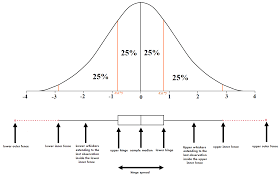
<b>Formula for Z score</b>

Z Score= (Observation — Mean)/Standard Deviation

z = (X — μ) / σ

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
 outliers=[]

def detect_outliers(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [12]:
outlier_point=detect_outliers(dataset)

outlier_point

[102, 107, 108]

# InterQuantile Range


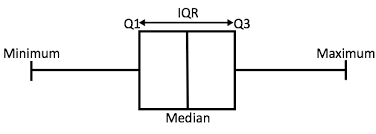

Not all data is normal or normal enough to treat it as being drawn from a Gaussian distribution.

A good statistic for summarizing a non-Gaussian distribution sample of data is the Interquartile Range, or IQR for short.

The IQR is calculated as the difference between the 75th and the 25th percentiles of the data and defines the box in a box and whisker plot.

Remember that percentiles can be calculated by sorting the observations and selecting values at specific indices. The 50th percentile is the middle value, or the average of the two middle values for an even number of examples. If we had 10,000 samples, then the 50th percentile would be the average of the 5000th and 5001st values.

We refer to the percentiles as quartiles (“quart” meaning 4) because the data is divided into four groups via the 25th, 50th and 75th values.

The IQR defines the middle 50% of the data, or the body of the data.


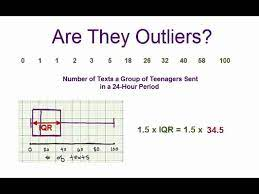

<b>Steps</b>
1. Arrange the data in increasing order
2. Calculate first(q1) and third quartile(q3)
3. Find interquartile range (q3-q1)
4.Find lower bound q1*1.5
5.Find upper bound q3*1.5

Anything that lies outside of lower and upper bound is an outlier

# Detecting outlier using InterQuantile Range

In [13]:
sorted(dataset)

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

In [14]:
quantile1, quantile3= np.percentile(dataset,[25,75])

print(quantile1,quantile3)

12.0 15.0


In [18]:
iqr=quantile3-quantile1
print(iqr_value)

3.0


In [19]:

lower_bound_val = quantile1 -(1.5 * iqr) 
upper_bound_val = quantile3 +(1.5 * iqr)

print(lower_bound_val,upper_bound_val)

7.5 19.5
